In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Activation, Flatten

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import pickle

In [3]:
import cv2

In [4]:
from keras import backend as K

In [5]:
training_classes = ['Corn spot','Corn healthy', 'Corn rust','Peach healthy','Peach rust']

In [6]:
import os

dim = (100,100)
corn, corn_, corn__, peach_, peach  = [],[],[],[],[]
def load_images_from_folder(folder, cat):
    
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
        if img is not None:
            images.append([img, cat])
    return images

In [8]:
corn = load_images_from_folder(folder='Training_Dataset/Corn spot',cat=0)
print(len(corn))

410


In [10]:
corn_ = load_images_from_folder(folder='Training_Dataset/Corn rust', cat=1)
print(len(corn_))

corn__ = load_images_from_folder(folder='Training_Dataset/Corn healthy/', cat=2)
print(len(corn__))

peach = load_images_from_folder(folder='Training_Dataset/Peach healthy/', cat=3)
print(len(peach))

peach_ = load_images_from_folder(folder='Training_Dataset/Peach rust/', cat=4)
print(len(peach_))

953
929
288
1838


In [11]:
corn = corn+corn_[:500]+corn__[:500]+peach+peach_[:500]

In [12]:
len(corn)

2198

In [13]:
import random
random.shuffle(corn)

In [14]:
corn

[[array([[[ 23,  35,  30],
          [ 87, 122, 111],
          [ 70, 125, 108],
          ...,
          [107, 138, 127],
          [115, 146, 128],
          [101, 131, 106]],
  
         [[  5,  12,   7],
          [ 68,  95,  84],
          [ 67, 115,  96],
          ...,
          [120, 151, 138],
          [128, 159, 140],
          [113, 144, 119]],
  
         [[  2,   6,   1],
          [ 26,  41,  31],
          [ 82, 116,  97],
          ...,
          [129, 160, 143],
          [121, 151, 130],
          [121, 150, 126]],
  
         ...,
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
  
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0

In [15]:
x, y = [],[]
for features,labels in corn:
    x.append(features/255.0)
    y.append(labels)

In [16]:
x

[array([[[0.09019608, 0.1372549 , 0.11764706],
         [0.34117647, 0.47843137, 0.43529412],
         [0.2745098 , 0.49019608, 0.42352941],
         ...,
         [0.41960784, 0.54117647, 0.49803922],
         [0.45098039, 0.57254902, 0.50196078],
         [0.39607843, 0.51372549, 0.41568627]],
 
        [[0.01960784, 0.04705882, 0.02745098],
         [0.26666667, 0.37254902, 0.32941176],
         [0.2627451 , 0.45098039, 0.37647059],
         ...,
         [0.47058824, 0.59215686, 0.54117647],
         [0.50196078, 0.62352941, 0.54901961],
         [0.44313725, 0.56470588, 0.46666667]],
 
        [[0.00784314, 0.02352941, 0.00392157],
         [0.10196078, 0.16078431, 0.12156863],
         [0.32156863, 0.45490196, 0.38039216],
         ...,
         [0.50588235, 0.62745098, 0.56078431],
         [0.4745098 , 0.59215686, 0.50980392],
         [0.4745098 , 0.58823529, 0.49411765]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

In [17]:
y

[1,
 2,
 4,
 1,
 2,
 2,
 0,
 1,
 2,
 0,
 1,
 4,
 4,
 2,
 4,
 1,
 4,
 2,
 1,
 4,
 2,
 2,
 1,
 0,
 4,
 0,
 3,
 0,
 1,
 1,
 4,
 1,
 4,
 4,
 0,
 2,
 2,
 4,
 0,
 2,
 4,
 1,
 0,
 4,
 1,
 0,
 0,
 1,
 1,
 4,
 4,
 4,
 2,
 1,
 0,
 4,
 4,
 4,
 2,
 1,
 1,
 1,
 4,
 2,
 2,
 1,
 3,
 4,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 4,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 4,
 4,
 2,
 3,
 2,
 4,
 0,
 2,
 0,
 1,
 2,
 2,
 4,
 4,
 1,
 4,
 0,
 2,
 1,
 1,
 3,
 2,
 1,
 0,
 1,
 1,
 3,
 3,
 0,
 3,
 2,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 4,
 4,
 2,
 1,
 0,
 0,
 2,
 4,
 1,
 3,
 4,
 4,
 3,
 0,
 1,
 0,
 1,
 4,
 4,
 1,
 4,
 0,
 0,
 2,
 4,
 2,
 4,
 4,
 1,
 1,
 0,
 4,
 1,
 3,
 1,
 4,
 3,
 1,
 2,
 2,
 0,
 0,
 1,
 4,
 0,
 0,
 1,
 4,
 2,
 4,
 1,
 4,
 3,
 0,
 0,
 4,
 1,
 4,
 0,
 4,
 2,
 0,
 4,
 1,
 0,
 1,
 4,
 1,
 4,
 0,
 4,
 0,
 2,
 3,
 0,
 1,
 2,
 4,
 4,
 2,
 2,
 0,
 4,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 4,
 2,
 2,
 4,
 0,
 3,
 2,
 2,
 3,
 0,
 3,
 1,
 3,
 3,
 2,
 1,
 2,
 4,
 0,
 2,
 0,
 3,
 1,
 3,
 3,
 2,
 3,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 4,


In [18]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', patience=3)

In [19]:
def build(activations = 3):
    
    model = Sequential()
    model.add(Conv2D(256, (3,3), input_shape=x[0].shape))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(activations))
    model.add(Activation('softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
model = build(activations=5)
hist = model.fit(x,y, validation_split=0.2, epochs=100, batch_size=128, callbacks=[es])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1758 samples, validate on 440 samples
Epoch 1/100
1758/1758 [==============================] - 222s 127ms/step - loss: 1.3862 - acc: 0.3862 - val_loss: 0.7633 - val_acc: 0.7295
Epoch 2/100
1758/1758 [==============================] - 213s 121ms/step - loss: 0.6146 - acc: 0.7474 - val_loss: 0.4472 - val_acc: 0.8250
Epoch 3/100
1758/1758 [==============================] - 212s 121ms/step - loss: 0.2898 - acc: 0.8953 - val_loss: 0.2495 - val_acc: 0.9182
Epoch 4/100
1758/1758 [==============================] - 209s 119ms/step - loss: 0.1897 - acc: 0.9255 - val_loss: 0.2452 - val_acc: 0.9182
Epoch 5/100
1758/1758 [==============================] - 207s 118ms/step - loss: 0.1169 - acc: 0.9573 - val_loss: 0.1525 - val_acc: 0.9500
Epoch 6/100
1758/1758 [==============================] - 204s 116ms/step - loss: 0.0843 - acc: 0.9710 - val_loss: 0.1119 - val_acc: 0.9614

In [22]:
import time
__name = 'disease_prediction_cnn_new_{}'.format(int(time.time()))
model.save(__name)

In [23]:
def build_dense(activations=3):
    
    model=Sequential()
    
    model.add(Dense(256, input_shape=x[0].shape))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(activations))
    model.add(Activation('softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model
    

In [24]:
dense_mod = build_dense(5)

In [88]:
history = dense_mod.fit(x,y, validation_split=0.2, batch_size=128, epochs=100, callbacks=[es])

Train on 1758 samples, validate on 440 samples
Epoch 1/100
 512/1758 [=======>......................] - ETA: 4:46 - loss: 0.0023 - acc: 1.0000

KeyboardInterrupt: 

In [ ]:
import time
NAME = 'dense_disease_prediction_latest_{}'.format(int(time.time()))
dense_mod.save(NAME)

In [93]:
def get_prediction(image_path, model_name='disease_prediction_cnn_new_1572812619'):
    
    import keras
    from keras.models import Sequential
    
    training_classes = ['Corn spot','Corn healthy', 'Corn rust','Peach healthy','Peach rusty']
    model = keras.models.load_model(model_name)
    pred = 0
    
    #process image
    
    import matplotlib.pyplot as plt
    
    img = cv2.imread(image_path)
    plt.imshow(img)
    img = cv2.resize(img, (100,100), interpolation=cv2.INTER_AREA)
    img = img/255.0
    
    img = np.array(img).astype(float)
    img = img[np.newaxis, ...]

    try:        
        pred = model.predict(img)
        pred = int(round(pred))
    
    except:
        pass
    
    print "Predictions : "
    max_pred = np.sum(pred)
    for i in range(len(training_classes)):
        print training_classes[i] ,": {0:.2f}%".format((pred[0][i]/max_pred)*100)
    return training_classes[np.argmax(pred)]   

Predictions : 
Corn spot : 99.15%
Corn healthy : 0.69%
Corn rust : 0.00%
Peach healthy : 0.01%
Peach rusty : 0.15%


'Corn spot'

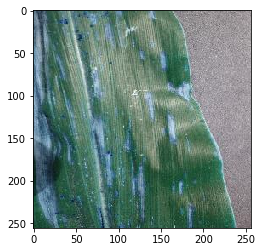

In [96]:
get_prediction(image_path='Training_Dataset/Corn spot/200.jpg')

Predictions : 
Corn spot : 0.00%
Corn healthy : 0.00%
Corn rust : 0.00%
Peach healthy : 99.99%
Peach rusty : 0.01%


'Peach healthy'

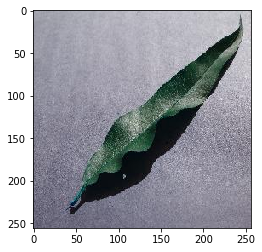

In [97]:
get_prediction(image_path='Training_Dataset/Peach healthy/101.jpg')

Predictions : 
Corn spot : 0.00%
Corn healthy : 95.84%
Corn rust : 0.00%
Peach healthy : 0.00%
Peach rusty : 4.15%


'Corn healthy'

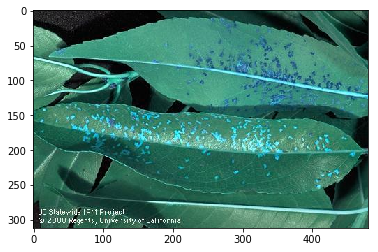

In [87]:
get_prediction(image_path='test.jpg')